## 1

4，
- (1):$\varepsilon (x_1^*+x_2^*+x_4^*)=\varepsilon (x_1^*)+\varepsilon (x_2^*)+\varepsilon (x_4^*)=\frac{1}{2}*(10^{-4}+10^{-3}+10^{-3})=1.05*10^{-3}$

- (2):$\varepsilon (x_1^*x_2^*x_3^*)=\varepsilon(x_1^*)*x_2^**x_3^*+\varepsilon(x_2^*)*x_3^**x_1^*+\varepsilon(x_3^*)x_1^**x_2^*=\frac{1}{2}*10^{-4}*0.031*385.6+\frac{1}{2}*10^{-3}*1.1021*385.6+\frac{1}{2}*10^{-1}*1.1021*0.031=0.2148$

- (3):$\frac{x_2^*}{x_4^*}=\frac{\varepsilon(x_2^*)x_4^*+\varepsilon(x_4^*)x_2^*}{{x_4^*}^2}=\frac{0.031*0.5*10^{-3}+56.430*0.5*10^{-3}}{56.430^2}=8.8654*10^{-6}$

10,

ans:

$\varepsilon(S^*)=\frac{1}{2}g(t^*+\varepsilon(t^*))^2-\frac{1}{2}g(t^*)^2=\frac{1}{2}g{\varepsilon(t^*)}^2+t\varepsilon(t^*)$

绝对误差随着t的增长而增大

$\varepsilon_r(S^*)=\varepsilon(S^*)/S^*=\frac{\varepsilon(t^*)^2}{t^*}+\frac{\varepsilon(t^*)}{2gt^*}$

相对误差随着t的增长而减小


11，

ans:

由递推式可知$\varepsilon(y_{10})=10^{10}\varepsilon(y_0)=10^{10}*\frac{1}{2}10^{-2}=\frac{1}{2}*10^{8}$,误差增大，是不稳定的

## 2


从$I_9$反推的递推式为$\begin{cases}I_9=x\\I_i=\frac{1-I_{i+1}}{i+1}\;i=8,7,\cdots1\end{cases}$

In [56]:
I = ones(1, 10);

for j = 5:10
    I(10) = j;

    for i = 9:-1:1
        I(i) = (1 - I(i + 1)) ./ (i + 1);
    end
    fprintf('I(9)=%f,I(0)=%f\n',j,I(1))

end


I(9)=5.000000,I(0)=0.367878
I(9)=6.000000,I(0)=0.367878
I(9)=7.000000,I(0)=0.367878
I(9)=8.000000,I(0)=0.367877
I(9)=9.000000,I(0)=0.367877
I(9)=10.000000,I(0)=0.367877


结果差异很小，算法十分稳定

## 3

$由递推式得X(k)=A^kX(0),若A可对角化且特征值的绝对值都小于1时，若k趋于无穷，A^k趋于0,X(k)也趋于零$

蒙特卡洛求积分可视化

stardard answer is:0.523599
The Monte Carlo simulation result is:0.514000

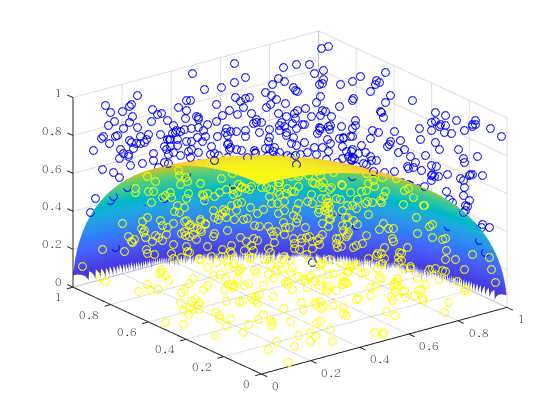

In [41]:
f = @(x, y) sqrt(1 - x .* x - y .* y);

in_bounds = @(x, y) x .* x + y .* y <= 1;

h = @(x) sqrt(1 - x .* x);

N = 1000;
beg_x = 0;
beg_y = 0;
beg_z = 0;
len_x = 1;
len_y = 1;
len_z = 1;
v = integral2(f, beg_x, beg_x + len_x, beg_y, h);
fprintf("stardard answer is:%f\n", v);
V = len_x .* len_y .* len_z;
n = 0;
x = 0;
y = 0;
z = 0;
list_x_out = []; % 点阵数组
list_y_out = [];
list_z_out = [];
list_x_in = [];
list_y_in = [];
list_z_in = [];

for i = 1:N
    x = beg_x + rand(1, 1) .* len_x;
    y = beg_y + rand(1, 1) .* len_y;
    z = beg_z + rand(1, 1) .* len_z;

    if in_bounds(x, y) && z <= f(x, y)
        n = n + 1;
        list_x_in = [list_x_in; x];
        list_y_in = [list_y_in; y];
        list_z_in = [list_z_in; z];
    else
        list_x_out = [list_x_out; x];
        list_y_out = [list_y_out; y];
        list_z_out = [list_z_out; z];
    end

end

fprintf("The Monte Carlo simulation result is:%f", n / N .* V);
fig = figure;
x = linspace(0, 1, 500);
y = x;
[X, Y] = meshgrid(x, y); % 绘制网格
z = 1 - X .* X - Y .* Y;
z(z < 0) = NaN; % 用布尔数组筛去圆域外的区域
Z = sqrt(z); % 传入矩形区域中符合函数参数要求的部分
surf(X, Y, Z, EdgeColor = 'none');
hold on %避免被刷新
scatter3(list_x_in, list_y_in, list_z_in, 'y');
scatter3(list_x_out, list_y_out, list_z_out,'b');


In [2]:
f=@(x) (x^2*cos(x/2)+1/2)*sqrt(4-x^2)

% for i=-2:0.1:2
%     f(i)
% end

beg_x=-2;
end_x=2;
beg_y=0;
end_y=3;
S=(end_x-beg_x)*(end_y-beg_y);
n=0
N=10000
for i=1:N
    x=beg_x+rand()*(end_x-beg_x)
    y=beg_y+rand()*(end_y-beg_y)
    if y<=f(x)
        n=n+1;
    end
end
n*S/N


MATLAB 函数已取消



result =

    0.5236

